### Packages

In [28]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import GridSearchCV
import numpy as np
import csv
import string
import collections
import random
import pandas as pd
import plotnine as p9
import json

# Load Data

In [2]:
df = pd.read_csv('data/iowa_with_month_item.csv')
X = df.drop(columns=[
    'gross_profit', 'store', 'longitude', 'latitude',
    'city', 'county', 'liter', 'bottles',
    'pop_city', 'fips', 'pop_county'
])
y = df['gross_profit']
df

,store,month,longitude,latitude,city,county,liter,bottles,gross_profit,cat_convenience_store,...,l_yu,l_yukon_jack,l_yukon_jack_fire,l_yukon_jack_perma_frost,l_zaya_gran_reserva_rum,l_zing_zang_blazing_bloody_mary_rts,l_zing_zang_bloody_mary_rts,l_zirbenz_stone_pine_liqueur_of_the_alps,l_zubrowka_bison_grass_vodka,l_zucca_rabarbaro
0,'da booze barn / west bend,1,-94.444878,42.959231,west bend,palo alto,112.775,593,4499.84,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,'da booze barn / west bend,2,-94.444878,42.959231,west bend,palo alto,104.100,637,4598.18,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,'da booze barn / west bend,3,-94.444878,42.959231,west bend,palo alto,113.350,672,4840.74,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,'da booze barn / west bend,4,-94.444878,42.959231,west bend,palo alto,84.150,522,3828.55,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,'da booze barn / west bend,5,-94.444878,42.959231,west bend,palo alto,114.050,664,4691.36,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23049,yesway store #1198 / swea city,7,-94.307848,43.385321,swea city,kossuth,25.900,580,1773.04,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23050,yesway store #1198 / swea city,9,-94.307890,43.384960,swea city,kossuth,9.050,289,626.34,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23051,yesway store #1198 / swea city,10,-94.307890,43.384960,swea city,kossuth,12.500,240,653.52,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23052,yesway store #1198 / swea city,11,-94.307890,43.384960,swea city,kossuth,9.125,198,642.18,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [11]:
df.columns.tolist()

['store',
 'month',
 'longitude',
 'latitude',
 'city',
 'county',
 'liter',
 'bottles',
 'gross_profit',
 'cat_convenience_store',
 'cat_distillery_brewery',
 'cat_gas_station',
 'cat_general_store',
 'cat_grocery_store',
 'cat_liquor_store_bar',
 'cat_other',
 'cat_pharmacy',
 'cat_unknown',
 'pop_city',
 'fips',
 'pop_county',
 'female_18_24',
 'female_25_34',
 'female_35_44',
 'female_45_64',
 'female_65_over',
 'male_18_24',
 'male_25_34',
 'male_35_44',
 'male_45_64',
 'male_65_over',
 'annual_income',
 'excessive_drinking',
 'gassale_x_gasstore',
 'l_10th_mountain_american_single_malt',
 'l_10th_mountain_bourbon',
 'l_10th_mountain_brandy',
 'l_10th_mountain_cordial',
 'l_10th_mountain_rye',
 'l_10th_mountain_vodka',
 'l_135_east_hyogo_japanese_gin',
 'l_15_stars_private_stock_8_and_15yr',
 'l_173_craft_distillery_barrel_kane',
 'l_173_craft_distillery_bourbon_whiskey',
 'l_173_craft_distillery_broken_beaker_silver_rum',
 'l_173_craft_distillery_premium_gin',
 'l_173_craft_disti

In [6]:
X

,month,cat_convenience_store,cat_distillery_brewery,cat_gas_station,cat_general_store,cat_grocery_store,cat_liquor_store_bar,cat_other,cat_pharmacy,cat_unknown,...,l_yu,l_yukon_jack,l_yukon_jack_fire,l_yukon_jack_perma_frost,l_zaya_gran_reserva_rum,l_zing_zang_blazing_bloody_mary_rts,l_zing_zang_bloody_mary_rts,l_zirbenz_stone_pine_liqueur_of_the_alps,l_zubrowka_bison_grass_vodka,l_zucca_rabarbaro
0,1,0,0,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2,0,0,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3,0,0,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4,0,0,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5,0,0,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23049,7,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23050,9,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23051,10,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23052,11,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [26]:
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=20, random_state=32)
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.15, random_state=123)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.176, random_state=123)

# Training & Validation

## Number of Trees: 30

In [33]:
rmse_list_30 = []
for depth in [3, 5, 7, 10, 15]:
    forest = RandomForestRegressor(n_estimators=30, max_depth=depth, random_state=32)
    forest.fit(X_train, y_train)
    y_val_pred = forest.predict(X_val)
    mse = mean_squared_error(y_val, y_val_pred)
    rmse = np.sqrt(mse)
    rmse_list_30.append(rmse)
    print(f"Depth={depth}, RMSE={rmse:.2f}")

Depth=3, RMSE=7560.73
Depth=5, RMSE=5923.65
Depth=7, RMSE=5138.50
Depth=10, RMSE=4801.82
Depth=15, RMSE=4331.36


## Number of Trees: 50

In [36]:
rmse_list_50 = []
for depth in [3, 5, 7, 10, 15]:
    forest = RandomForestRegressor(n_estimators=50, max_depth=depth, random_state=32)
    forest.fit(X_train, y_train)
    y_val_pred = forest.predict(X_val)
    mse = mean_squared_error(y_val, y_val_pred)
    rmse = np.sqrt(mse)
    rmse_list_50.append(rmse)
    print(f"Depth={depth}, RMSE={rmse:.2f}")

Depth=3, RMSE=7441.55
Depth=5, RMSE=5720.53
Depth=7, RMSE=4938.85
Depth=10, RMSE=4441.32
Depth=15, RMSE=4078.47


## Number of Trees: 70

In [37]:
rmse_list_70 = []
for depth in [3, 5, 7, 10, 15]:
    forest = RandomForestRegressor(n_estimators=70, max_depth=depth, random_state=32)
    forest.fit(X_train, y_train)
    y_val_pred = forest.predict(X_val)
    mse = mean_squared_error(y_val, y_val_pred)
    rmse = np.sqrt(mse)
    rmse_list_70.append(rmse)
    print(f"Depth={depth}, RMSE={rmse:.2f}")

Depth=3, RMSE=7479.69
Depth=5, RMSE=5710.63
Depth=7, RMSE=4911.54
Depth=10, RMSE=4422.48
Depth=15, RMSE=4074.08


## Number of Trees: 100

In [29]:
for depth in [3, 5, 7, 10, 15]:
    forest = RandomForestRegressor(n_estimators=100, max_depth=depth, random_state=32)
    forest.fit(X_train, y_train)
    y_val_pred = forest.predict(X_val)
    mse = mean_squared_error(y_val, y_val_pred)
    rmse = np.sqrt(mse)
    print(f"Depth={depth}, RMSE={rmse:.2f}")

Depth=3, RMSE=7475.21
Depth=5, RMSE=5770.29
Depth=7, RMSE=4949.20


Depth=10, RMSE=4429.30
Depth=15, RMSE=4097.29


In [35]:
rmse_list_100 = [7475.21, 5770.29, 4949.20, 4429.30, 4097.29]
rmse_list_100

[7475.21, 5770.29, 4949.2, 4429.3, 4097.29]

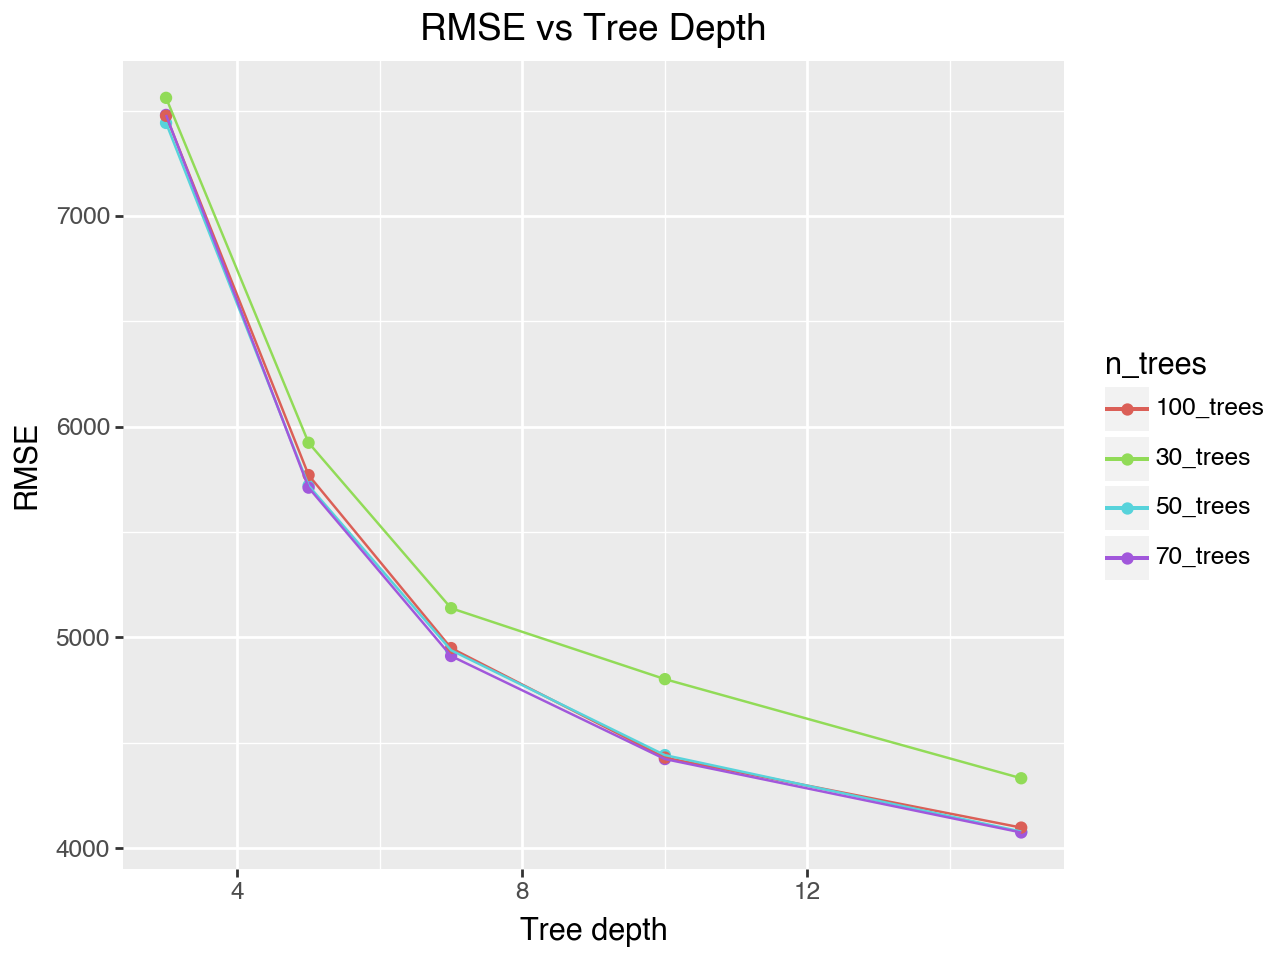

In [38]:
df_rmse = pd.DataFrame({
    'depth': [3, 5, 7, 10, 15],
    '30_trees': rmse_list_30,
    '50_trees': rmse_list_50,
    '70_trees': rmse_list_70,
    '100_trees': rmse_list_100,
})
df_rmse_long = pd.melt(df_rmse,
                       id_vars='depth',
                       var_name='n_trees',
                       value_name='rmse')
df_rmse_long.to_csv('table/rmse.csv', index=False)
plot = (
    p9.ggplot(df_rmse_long, p9.aes(x='depth', y='rmse', color='n_trees')) +
    p9.geom_point() +
    p9.geom_line() +
    p9.labs(title='RMSE vs Tree Depth',
            x='Tree depth',
            y='RMSE')
)
plot

# Test

In [39]:
forest_test = RandomForestRegressor(n_estimators=50, max_depth=15, random_state=32)
forest_test.fit(X_train, y_train)
prediction = forest_test.predict(X_test)
prediction

array([ 1403.45587639,  1565.87811048,  1519.17432934, ...,
       26442.36860773,  3530.27797502,  4469.88309445], shape=(3459,))

In [41]:
df_importance = pd.DataFrame({
    'feat': X.columns,
    'importance': list(forest_test.feature_importances_)
})
df_importance = df_importance.reset_index(drop=True)
df_importance.to_csv('table/feat_importance.csv', index=False)
df_importance_dict = df_importance.to_dict(orient='records')
with open('table/feat_importance.json', 'w') as f:
    json.dump(df_importance_dict, f, indent=2)

In [40]:
rmse_test = np.sqrt(mean_squared_error(y_test, prediction))
print(f"RMSE: {rmse_test:.2f}")

RMSE: 4949.21


In [42]:
df['gross_profit'].describe()

count     23054.000000
mean       6463.280572
std       17851.826561
min          10.750000
25%        1329.480000
50%        2424.515000
75%        5502.410000
max      499690.940000
Name: gross_profit, dtype: float64

In [43]:
summary = df['gross_profit'].describe()
with open('table/gross_profit_summary.json', 'w') as f:
    json.dump(summary.to_dict(), f, indent=2)

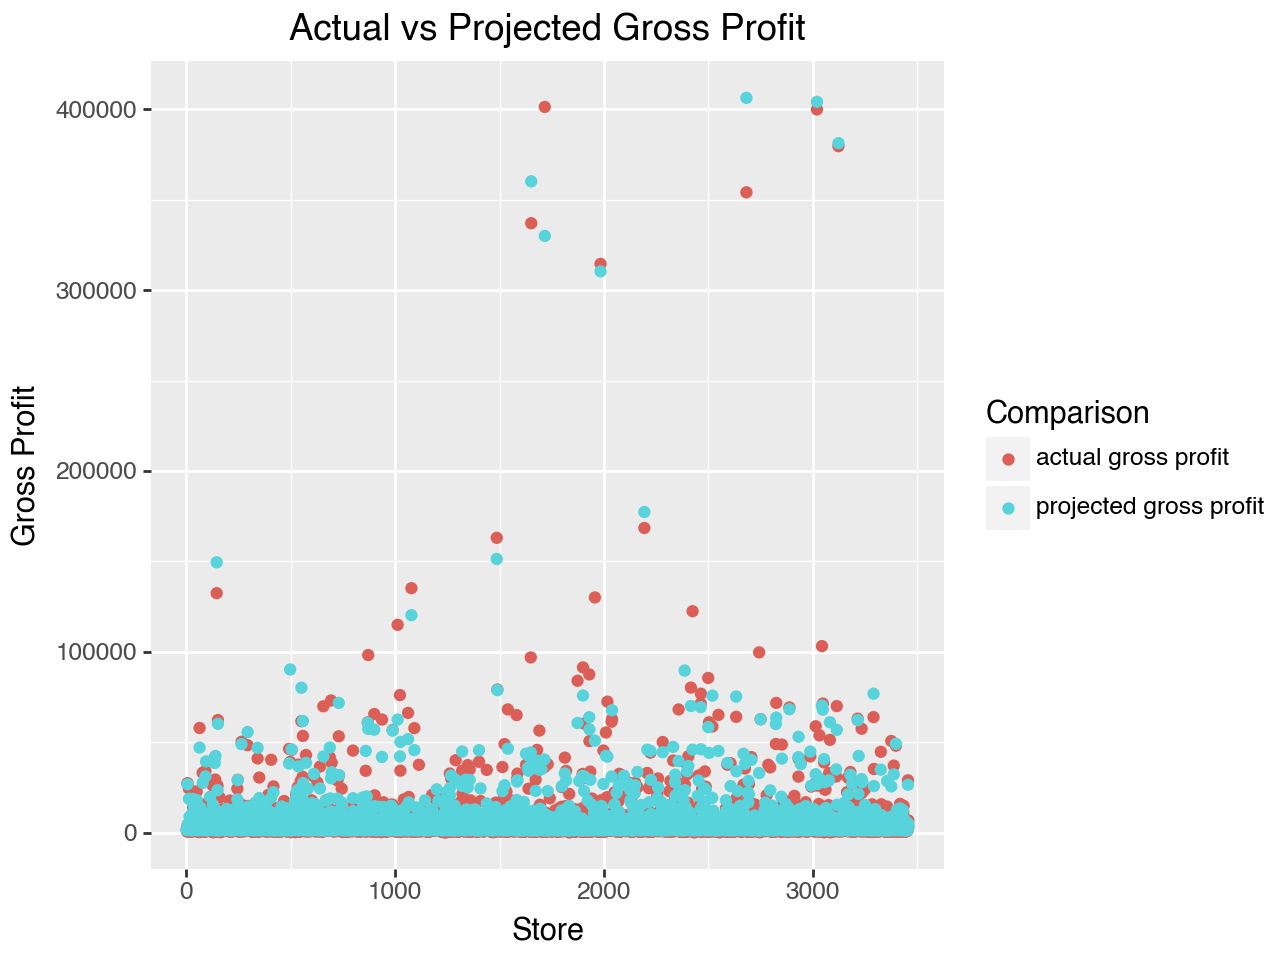

In [49]:
import pandas as pd
import plotnine as p9

df_diff = pd.DataFrame({
    'store': range(1, 3460),
    'actual gross profit': y_test,
    'projected gross profit': prediction
})

df_diff_long = pd.melt(
    df_diff,
    id_vars='store',
    var_name='comparison',
    value_name='gross_profit'
)

df_diff_long.to_csv('table/diff_actu_predi.csv', index=False)

plot = (
    p9.ggplot(df_diff_long, p9.aes(x='store', y='gross_profit', color='comparison')) +
    p9.geom_point() +
    p9.labs(title='Actual vs Projected Gross Profit',
            x='Store',
            y='Gross Profit',
            color='Comparison')
)
plot

In [46]:
X_test

,month,cat_convenience_store,cat_distillery_brewery,cat_gas_station,cat_general_store,cat_grocery_store,cat_liquor_store_bar,cat_other,cat_pharmacy,cat_unknown,...,l_yu,l_yukon_jack,l_yukon_jack_fire,l_yukon_jack_perma_frost,l_zaya_gran_reserva_rum,l_zing_zang_blazing_bloody_mary_rts,l_zing_zang_bloody_mary_rts,l_zirbenz_stone_pine_liqueur_of_the_alps,l_zubrowka_bison_grass_vodka,l_zucca_rabarbaro
16001,1,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7359,4,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12764,5,0,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4009,12,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7885,11,0,0,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17881,3,0,0,1,0,0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16599,9,0,0,0,0,0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13704,8,0,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
22655,3,0,0,0,0,1,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
